## Perceptron Algorithm

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Setting the random seed, feel free to change it and see different solutions.
np.random.seed(42)

In [70]:
def stepFunction(t):
    if t >= 0:
        return 1
    return 0

def prediction(X, W, b):
    return stepFunction((np.matmul(X,W)+b)[0])

In [71]:
# The function should receive as inputs the data X, the labels y,
# the weights W (as an array), and the bias b,
# update the weights and bias W, b, according to the perceptron algorithm,
# and return W and b.
def perceptronStep(X, y, W, b, learn_rate = 0.01):
    # Fill in code
    for i in range(len(X)):
        y_hat = prediction(X[i],W,b)
        if y[i]-y_hat == 1:
            W[0] += X[i][0]*learn_rate
            W[1] += X[i][1]*learn_rate
            b += learn_rate
        elif y[i]-y_hat == -1:
            W[0] -= X[i][0]*learn_rate
            W[1] -= X[i][1]*learn_rate
            b -= learn_rate
    return W, b
    
# This function runs the perceptron algorithm repeatedly on the dataset,
# and returns a few of the boundary lines obtained in the iterations,
# for plotting purposes.
# Feel free to play with the learning rate and the num_epochs,
# and see your results plotted below.
def trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 25):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    # These are the solution lines that get plotted below.
    boundary_lines = []
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = perceptronStep(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
    return boundary_lines

In [72]:
data = pd.read_csv('data.csv')

In [73]:
data.head()
X = data.loc[:,['X','Y']]
Y = data.loc[:,'label']
X = X.values
y = Y.values

print(y.shape)
print(X.shape)

(100,)
(100, 2)


In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

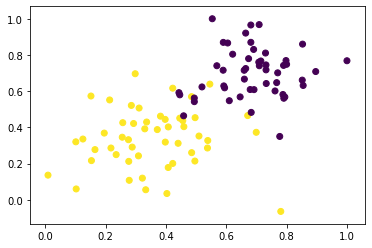

In [76]:
plt.scatter(X[:,0],X[:,1],c=y)

In [77]:
result = trainPerceptronAlgorithm(X_train,y_train)

In [78]:
result

[(array([-0.18600933]), array([-1.78735772])),
 (array([0.23590968]), array([-1.93863222])),
 (array([1.55202054]), array([-2.41050952])),
 (array([13.2543181]), array([-6.63764541])),
 (array([37.79666137]), array([-16.51841373])),
 (array([139.99223178]), array([-61.90011816])),
 (array([-79.17605193]), array([35.42533568])),
 (array([-43.87345417]), array([20.89561414])),
 (array([-22.9305489]), array([11.05540578])),
 (array([-15.39756955]), array([7.51596913])),
 (array([-11.5182786]), array([5.69325014])),
 (array([-9.15330255]), array([4.58204532])),
 (array([-7.56075362]), array([3.83377219])),
 (array([-6.84208591]), array([3.69404392])),
 (array([-6.11355357]), array([3.34484983])),
 (array([-5.51086057]), array([3.05597201])),
 (array([-5.00399458]), array([2.8130252])),
 (array([-4.57178425]), array([2.60586172])),
 (array([-4.19886704]), array([2.42711813])),
 (array([-3.87382487]), array([2.27132161])),
 (array([-3.58799457]), array([2.13431979])),
 (array([-3.3346842]), 

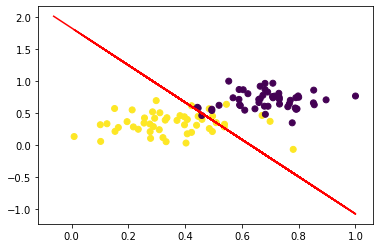

In [83]:
plt.scatter(X[:,0],X[:,1],c=y)
vals = result[-1]
theta = vals[0][0]
intercept = vals[1][0]
y2 = X*theta + intercept
plt.plot(X,y2,color='Red')
plt.show()